In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

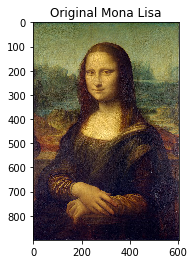

In [90]:
img = plt.imread('MonaLisa.jpg')
plt.imshow(img)
plt.title("Original Mona Lisa")
plt.show()

In [91]:
# preprocessing the input
m, n = img.shape[0], img.shape[1]
sample = []
for i in range(5000):
    tmp = []
    tmp.append(np.random.randint(m))
    tmp.append(np.random.randint(n))
    sample.append(tmp)
sample = np.array(sample)
print(sample.shape)

(5000, 2)


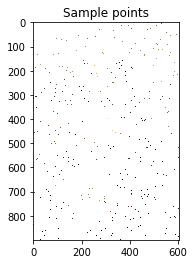

In [92]:
# preprocessing the ouput
scale_img = img / 255.0
sample_img = np.ones([m, n, 3], dtype = np.float)
data = []
data_255 = []
for i in range(5000):
    data.append(scale_img[sample[i][0], sample[i][1]])
    data_255.append(img[sample[i][0], sample[i][1]])
    sample_img[sample[i][0], sample[i][1]] = scale_img[sample[i][0], sample[i][1]]
data = np.array(data)
data_255 = np.array(data_255)
plt.imshow(sample_img)
plt.title("Sample points")
plt.show()  

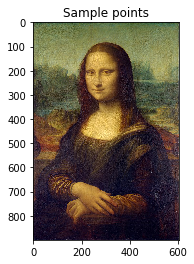

In [74]:
plt.imshow(scale_img)
plt.title("Sample points")
plt.show() 

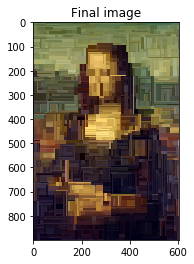

In [75]:
# build final image
def run_rf(n_tree=1, depth=None, img_name=None):
    clf = RandomForestRegressor(n_estimators=n_tree, max_depth=depth)
    clf.fit(sample, data)
    pred = np.zeros([m, n, 3])
    for i in range(m):
        for j in range(n):
            pred[i, j] = clf.predict(np.array([i, j]).reshape(1, -1))
    plt.title(img_name)
    plt.imshow(pred)
    plt.show()
    return pred
_ = run_rf(img_name = 'Final image')       

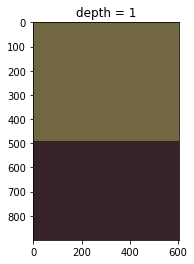

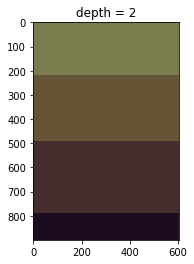

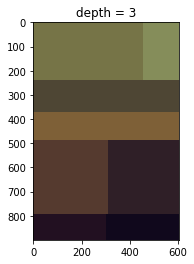

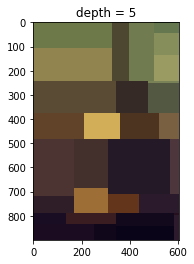

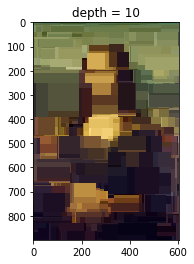

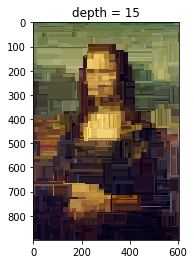

In [61]:
# different depth
depth = [1, 2, 3, 5, 10, 15]
for i in depth:
    img_name = "depth = " + str(i)
    run_rf(depth=i, img_name=img_name)

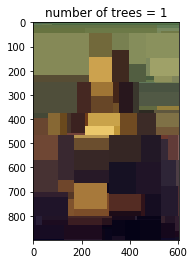

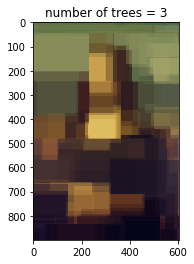

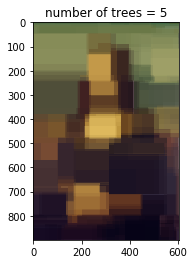

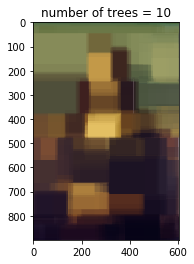

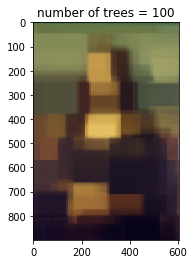

In [76]:
# different number of trees
nums = [1, 3, 5, 10, 100]
for num in nums:
    img_name = "number of trees = " + str(num)
    run_rf(n_tree=num, depth=7, img_name=img_name)

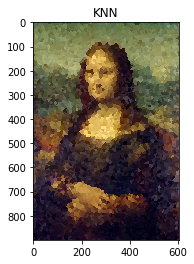

In [98]:
# knn
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(sample, data_255)
pred = np.zeros([m,n,3])
for i in range(m):
    for j in range(n):
        pred[i, j] = knn.predict(np.array([i, j]).reshape(1, -1)) / 255
plt.title("KNN")
plt.imshow(pred)
plt.show()  

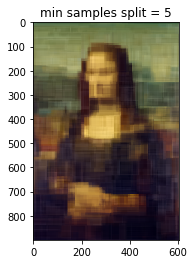

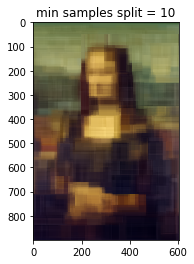

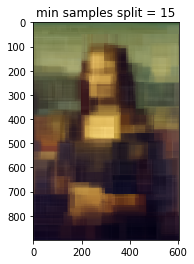

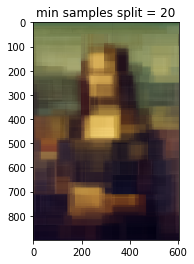

In [100]:
# different pruning
# min_samples_split
split_ = [5, 10, 15, 20]
for split in split_:
    clf = RandomForestRegressor(n_estimators=20, max_depth=20, min_samples_split=split)
    clf.fit(sample, data)
    pred = np.zeros([m, n, 3])
    for i in range(m):
        for j in range(n):
            pred[i, j] = clf.predict(np.array([i, j]).reshape(1, -1))
    title = "min samples split = " + str(split)
    plt.title(title)
    plt.imshow(pred)
    plt.show()

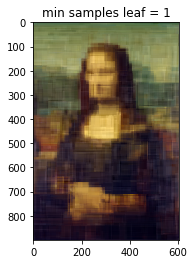

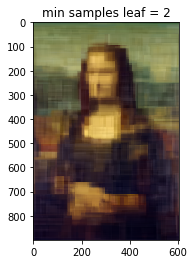

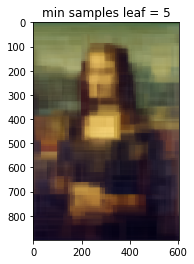

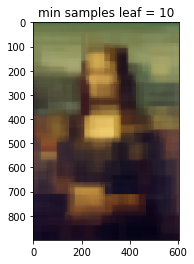

In [101]:
# min_samples_leaf
leaf_ = [1, 2, 5, 10]
for leaf in leaf_:
    clf = RandomForestRegressor(n_estimators=20, max_depth=20, min_samples_leaf=leaf)
    clf.fit(sample, data)
    pred = np.zeros([m, n, 3])
    for i in range(m):
        for j in range(n):
            pred[i, j] = clf.predict(np.array([i, j]).reshape(1, -1))
    title = "min samples leaf = " + str(leaf)
    plt.title(title)
    plt.imshow(pred)
    plt.show()